<a href="https://colab.research.google.com/github/mlcow/prob-stats/blob/master/Univariate_parametric_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.special

# Bernoulli

Plot variations of a bernoulli as $p$ varies

In [0]:
def plot_bernoulli(n,p):
  def bernoulli_f(x,n,p):
    return scipy.special.binom(n, x) * 1.0 * (p ** x) * ((1 - p) ** (n - x))
  
  x = np.arange(1, n+1)
  plt.plot(x, [bernoulli_f(i, n, p) for i in x], label="n :{} p:{}".format(n, p), alpha=0.9)
  

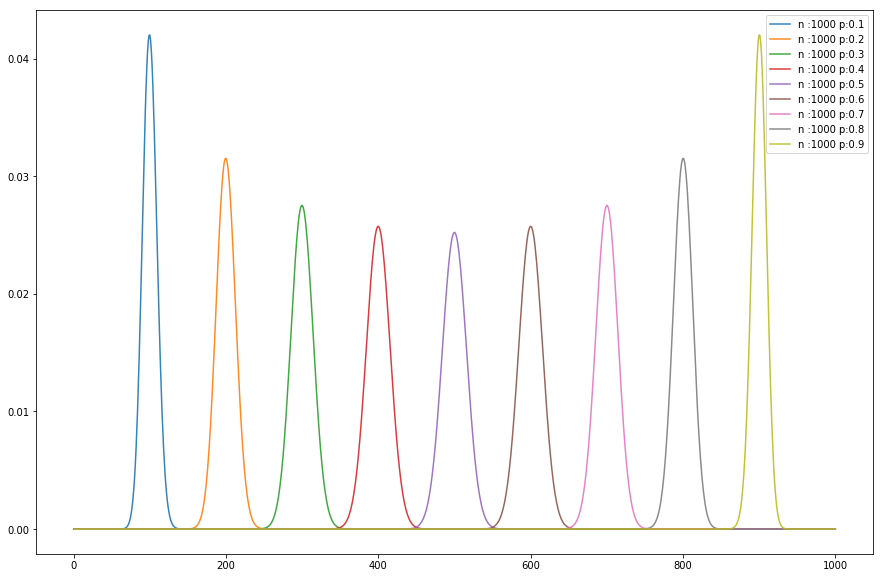

In [49]:
plt.figure(figsize=[15,10])
for i in np.arange(.1, 1, .1):
  plot_bernoulli(1000, i)
plt.legend()

# Hypergeometric Distribution

$$f_x(x;M,K,n) = \frac{\binom{K}{x}\binom{M-K}{n-x}}{\binom{M}{n}}I_{\{0,1,...,n\}}(x)$$

Probably of selecting $x$ of a kind when selecting (without replacement) $n$  from a set of $M$ items containing of two kinds $K$ and $M-K$.

In [0]:
def plot_hypergeometric(m,k,n, fmt='-', alpha=0.8):
  def binom(a, b):
    return scipy.special.binom(a, b)
  
  def hypergeometric_f(x,m,k,n):
    return 1.0 * binom(k, x) * binom(m-k, n-x) / binom(m, n)
    
  x = np.arange(0, 1+n)
  plt.plot(x, 
           [hypergeometric_f(i, m, k, n) for i in x], 
           fmt,
           label="m: {}, k:{}, n:{}".format(m, k, n),
           alpha=alpha)

Text(0.5,1,'Varying n at K = 200, 400, 800')

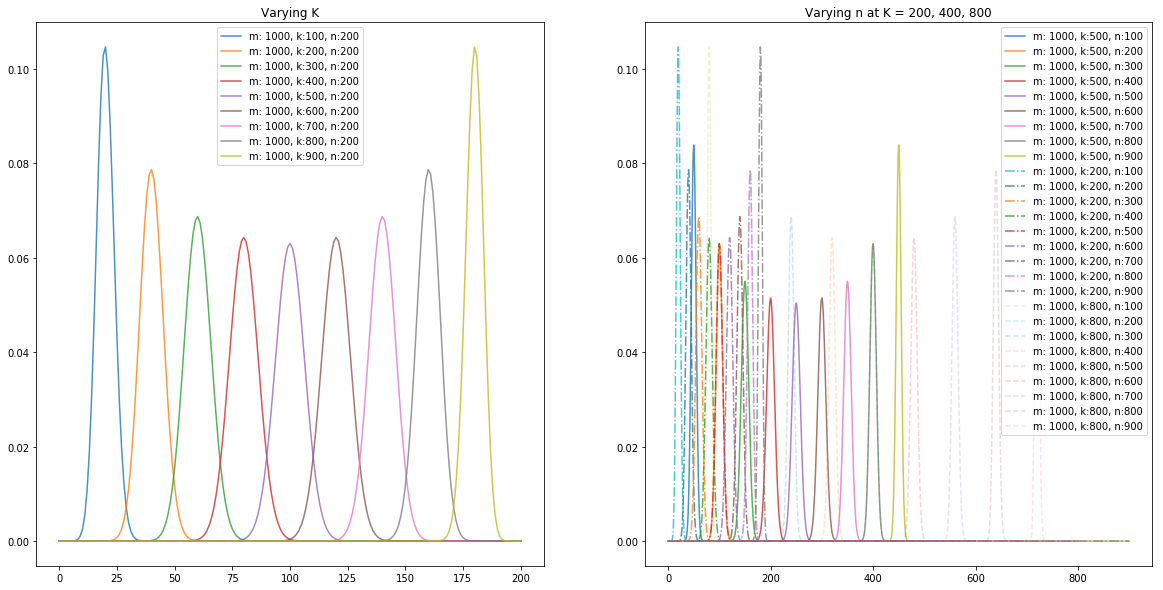

In [73]:
# Varying k
plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
for k in range(100, 1000, 100):
  plot_hypergeometric(1000, k, 200)
  
plt.legend()
plt.title("Varying K")

plt.subplot(1,2,2)

# Varying n
for n in range(100, 1000, 100):
  plot_hypergeometric(1000, 500, n)
  
# Varying n
for n in range(100, 1000, 100):
  plot_hypergeometric(1000, 200, n, '-.')
  
# Varying n
for n in range(100, 1000, 100):
  plot_hypergeometric(1000, 800, n, '--', 0.2)
  
plt.legend()
plt.title("Varying n at K = 200, 400, 800")

# Poisson Distribution

$$f_X(x; \lambda)=\frac{e^{-\lambda}\lambda^x}{x!}$$

$\mu=\lambda$

$\sigma^2=\lambda$

$m_x(t)=e^\lambda(e^t-1)$

In [84]:
def plot_poisson(_lambda, n):
  def poisson_f(x, _lambda):
    return np.exp(- _lambda) * (float(_lambda)**x) / scipy.special.factorial(x)
    
  x = np.arange(0, n+1)
  y = [poisson_f(i, _lambda) for i in x]
  plt.plot(x, y, label="lambda: {}".format(_lambda))

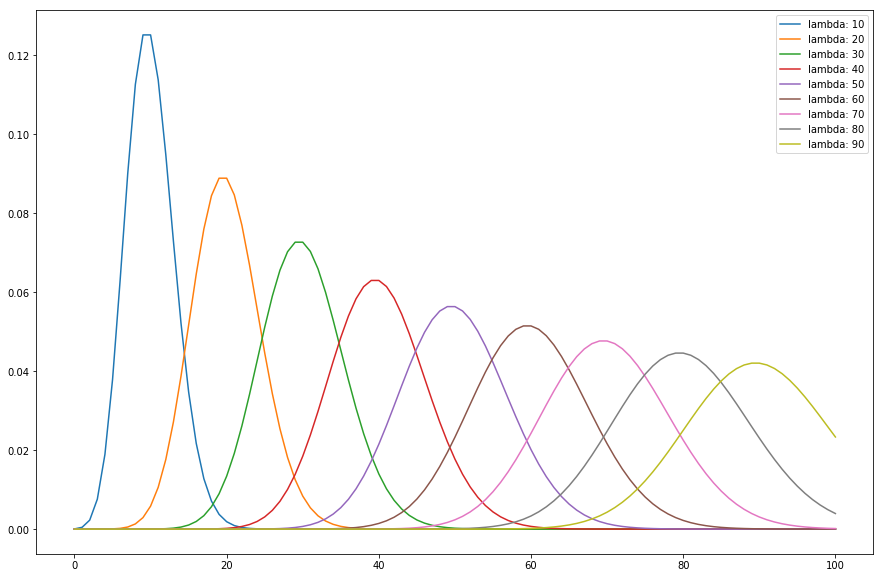

In [93]:
plt.figure(figsize=[15,10])
for i in range(10, 100, 10):
  plot_poisson(i, 100)
plt.legend()